In [2]:
# Preparar dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Métricas Classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas Regressão
import sklearn.metrics as sm
import numpy as np

# Criar Modelos
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping

# limpar a tela do jupyter
from IPython.display import clear_output

# Otimização
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

## Regressão em Machine Learning

A regressão é uma técnica de aprendizado de máquina supervisionada utilizada para prever uma quantidade contínua. Ela encontra a relação entre as variáveis dependentes (saída) e independentes (características) em um conjunto de dados.

### Tópicos

### 1. Tipos de Regressão

#### a. Regressão Linear Simples
A regressão linear simples encontra a relação linear entre uma variável independente (X) e a variável dependente (Y). A relação é representada como uma linha reta.

#### b. Regressão Linear Múltipla
A regressão linear múltipla encontra a relação entre várias variáveis independentes (X1, X2, ..., Xn) e a variável dependente (Y). `Apenas 1 neurônio na camada de saída e função de ativação linear`

#### c. Regressão Polinomial
A regressão polinomial modela a relação como uma equação polinomial. É útil quando os dados têm uma relação curvilínea.

`A regressão polinomial é uma forma de análise de regressão que modela a relação entre uma variável dependente 
y e uma ou mais variáveis independentes X usando uma equação polinomial. Ao contrário da regressão linear simples, que modela a relação como uma linha reta, a regressão polinomial pode capturar relações mais complexas que são curvilíneas ou não lineares.`
#### d. Regressão de Ridge e Lasso
Ridge e Lasso são técnicas de regularização que ajudam a evitar o overfitting no modelo.

### 2. Avaliação de Modelos de Regressão

#### Root Mean Square Error (RMSE):

- O que é: A raiz quadrada da média dos erros quadráticos, medindo a diferença entre os valores que o modelo prevê e os valores reais.
- O que nos diz: Oferece uma noção da magnitude dos erros do modelo, penalizando mais fortemente grandes erros.
- Valor Ideal: Quanto mais próximo de 0, melhor.

#### Mean Square Error (MSE):
- O que é: A média dos erros quadráticos.
- O que nos diz: Semelhante ao RMSE, mostra o quão bem o modelo está ajustado, com maior penalização para grandes erros.
- Valor Ideal: O valor ideal é 0.

#### Mean Absolute Error (MAE):
- O que é: A média dos valores absolutos dos erros.
- O que nos diz: Fornece uma medida das previsões erradas sem penalizar grandes erros tanto quanto o MSE e o RMSE.
- Valor Ideal: 0, significando que as previsões estão perfeitamente corretas.

#### Median Absolute Error:
- O que é: A mediana dos valores absolutos dos erros.
- O que nos diz: Dá uma ideia de como o modelo está performando em um caso "típico" e é menos sensível a outliers.
- Valor Ideal: 0 é o valor ideal.

#### Explained Variance Score:
- O que é: Mostra a proporção da variação total na variável dependente que é capturada pelo modelo.
- O que nos diz: Um valor mais alto indica que o modelo explica uma grande parte da variabilidade nos dados.
- Valor Ideal: 100% é o valor ideal.

#### R2 Score:
- O que é: A porcentagem da variação da variável dependente que é previsível a partir das variáveis independentes.
- O que nos diz: Um valor mais alto significa que mais variações são explicadas pelo modelo, o que é desejável.
- Valor Ideal: 100% é o valor ideal.

#### Adjusted R2:
- O que é: Semelhante ao R2, mas ajustado com base no número de preditores no modelo.
- O que nos diz: Dá uma medida mais realista de quão bem o modelo se ajusta aos dados, especialmente quando se adiciona mais variáveis.
- Valor Ideal: 100% seria ideal, mas em geral, um valor que seja próximo ou igual ao R2 é considerado bom.


In [3]:
def metricas_regressao(X_test, y_test, scaler_y, model):
    """
    Avalia métricas de regressão para um modelo e conjunto de teste fornecidos.

    Parâmetros:
    - X_test: características do conjunto de teste.
    - y_test: rótulos verdadeiros do conjunto de teste.
    - scaler_y: scaler utilizado para normalizar a variável alvo.
    - model: modelo treinado para fazer previsões.

    Retorna:
    Métricas de avaliação de regressão impressas.
    """

    # 1. Fazer previsões usando o modelo fornecido
    predict = model.predict(X_test)

    # 2. Inverter a transformação para obter os valores originais (não normalizados)
    predict = scaler_y.inverse_transform(predict)
    real = scaler_y.inverse_transform(y_test)

    # 3. Calcular R2 e R2 ajustado
    k = X_test.shape[1]  # número de características independentes
    n = len(X_test)  # tamanho da amostra
    r2 = sm.r2_score(real, predict)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)  # fórmula para R2 ajustado

    # 4. Imprimir métricas
    print('Root Mean Square Error:', round(np.sqrt(np.mean(np.array(predict) - np.array(real))**2), 2))
    print('Mean Square Error:', round(sm.mean_squared_error(real, predict), 2))
    print('Mean Absolut Error:', round(sm.mean_absolute_error(real, predict), 2))
    print('Median Absolut Error:', round(sm.median_absolute_error(real, predict), 2))
    print('Explain Variance Score:', round(sm.explained_variance_score(real, predict) * 100, 2))
    print('R2 score:', round(sm.r2_score(real, predict) * 100, 2))
    print('Adjusted R2 =', round(adj_r2, 3) * 100)

def plot_loss(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title('Loss ao Longo das Épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Regressão Linear Múltipla

O conjunto de dados "energydata_complete.csv" concentra-se no consumo de energia de aparelhos em uma residência e nas condições ambientais que podem influenciar esse consumo.

Descrição das colunas:

``date``: A data e hora do registro.

``Appliances``: Consumo de energia dos aparelhos, medido em watt-hora (Wh). Esta é a variável alvo em muitos estudos usando este conjunto de dados, pois o objetivo é geralmente prever o consumo com base nas demais variáveis.

``lights``: Consumo de energia das luzes da residência, em Wh.

``T1`` - ``T9``: São as temperaturas, em graus Celsius, registradas em diferentes cômodos da residência. Por exemplo, T1 pode ser a temperatura na sala de estar, enquanto T2 pode ser a temperatura na cozinha, e assim por diante (a exata correspondência entre o código T e o cômodo depende da descrição original do dataset).

``RH_1`` - ``RH_9``: Representam a umidade relativa, em percentagem (%), em diferentes cômodos da residência. Assim como as temperaturas, cada código RH corresponde a um cômodo específico.

``T_out``: Temperatura fora da residência, em graus Celsius.

``Press_mm_hg``: Pressão atmosférica em mm Hg.

``RH_out``: Umidade relativa fora da residência, em percentagem (%).

``Windspeed``: Velocidade do vento em m/s.

``Visibility``: Visibilidade em km.

``Tdewpoint``: Ponto de orvalho, em graus Celsius. O ponto de orvalho é a temperatura na qual o ar está saturado com vapor de água, e a condensação pode ocorrer.

``rv1`` - ``rv2``: São variáveis aleatórias, incluídas no conjunto de dados para testar modelos de regressão e verificar se são capazes de distinguir as características relevantes das irrelevantes. Eles não têm impacto real sobre o consumo de energia.

In [4]:
# Bases de Dados sem valores núlos e somente valores numéricos
df_regressao = pd.read_csv('energydata_complete.csv')
df_regressao.drop('date', axis = 1, inplace = True)
print(df_regressao.info())

# Separar X e y
X_regressao = df_regressao.drop('Appliances', axis = 1)
y_regressao = df_regressao[['Appliances']]

# Normalizar X e y
scaler_X_regressao = MinMaxScaler()
X_regressao = scaler_X_regressao.fit_transform(X_regressao)

scaler_y_regressao = MinMaxScaler()
y_regressao = scaler_y_regressao.fit_transform(y_regressao)

# Separar X e y em treinamento (70%), validação (15%) e teste (15%)
X_train_regressao, X_temp, y_train_regressao, y_temp = train_test_split(X_regressao, y_regressao, test_size=0.3, random_state=42)
X_val_regressao, X_test_regressao, y_val_regressao, y_test_regressao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exibe as 5 primeiro linhas do df_regressao
df_regressao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


93/93 [==============================] - 0s 1ms/step
Root Mean Square Error: 4.31
Mean Square Error: 12037.01
Mean Absolut Error: 63.7
Median Absolut Error: 47.59
Explain Variance Score: 0.0
R2 score: -0.15
Adjusted R2 = -1.0999999999999999


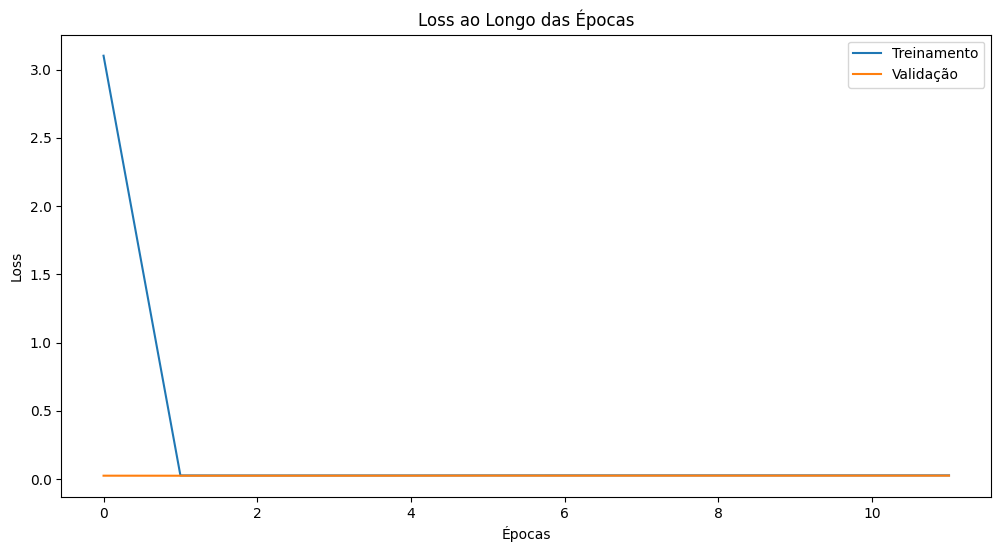

In [5]:
# Criar modelo
model_regressao = Sequential()
model_regressao.add(Input(shape=(X_train_regressao.shape[1],)))  # Camada de entrada explícita
model_regressao.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dropout(0.2))
model_regressao.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dropout(0.2))
model_regressao.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_regressao.add(Dense(1, activation='linear'))  # Saída linear para regressão

# Compilar modelo
model_regressao.compile(loss='mean_squared_error', optimizer='adam')

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Treinar modelo com o Early Stopping como callback
history = model_regressao.fit(X_train_regressao, 
                    y_train_regressao, 
                    epochs=20, 
                    batch_size=32,
                    validation_data=(X_val_regressao, y_val_regressao),
                    callbacks=[early_stopping])
                    
clear_output(wait=True)
metricas_regressao(X_test_regressao, y_test_regressao, scaler_y_regressao, model_regressao)
plot_loss(history)

# Análise das Métricas de Regressão
`Root Mean Square Error (RMSE) - 4.08`:

- É a raiz quadrada da média dos erros quadrados entre os valores reais e previstos. Um valor mais baixo é melhor, indicando que as previsões estão mais próximas dos valores reais.
- Um RMSE de 4.08 sugere que, em média, suas previsões têm um erro de cerca de 4.08 unidades em relação aos valores reais.

`Mean Square Error (MSE) - 12035.05`:

- É a média dos erros quadrados entre os valores reais e previstos. Como o RMSE, um valor mais baixo é melhor.
- O MSE é muito sensível a grandes erros porque ele eleva os erros ao quadrado. Um valor tão alto em comparação com o RMSE sugere a presença de alguns erros muito grandes.

`Mean Absolute Error (MAE) - 63.81`:

- É a média dos valores absolutos dos erros. Dá uma noção do tamanho típico do erro, mas sem considerar sua direção.
- Um MAE de 63.81 sugere que, em média, suas previsões têm um erro de cerca de 63.81 unidades, independentemente da direção.

`Median Absolute Error - 47.82`:

- É a mediana dos erros absolutos. É menos sensível a valores extremos do que o MAE.
- Um valor de 47.82 sugere que o erro típico (mediano) é de 47.82 unidades.

`Explained Variance Score - 0.0`:

- É uma medida que indica a proporção da variância do target que é explicada pelas variáveis independentes no modelo.
- Um valor de 0.0 indica que o modelo não explica nenhuma variância do target, o que não é um bom sinal.

`R2 Score - -0.14`:

- É o coeficiente de determinação, uma métrica que indica a proporção da variância na variável dependente que é previsível a partir das variáveis independentes.
- Um valor de 1.0 seria um ajuste perfeito. Um valor negativo como -0.14 sugere que o modelo é pior do que um modelo horizontal simples. Isso é alarmante e sugere que o modelo não é adequado para os dados ou que algum erro ocorreu durante o treinamento ou avaliação.

`Adjusted R2 - -1.1 (ou -110%)`:

- É uma versão do R2 ajustado para o número de preditores no modelo. Leva em consideração a complexidade do modelo.
- Um valor negativo tão baixo sugere novamente que o modelo não é adequado para os dados.

# Classificação
### Tipos de Classificação

1. **Classificação Binária**: Classificação com duas classes. Por exemplo, determinar se um email é spam ou não spam. ``Usa função de ativação sigmoid na camada de saída com 1 neurônio``

2. **Classificação Multiclasse**: Classificação com mais de duas classes. Por exemplo, classificar uma fruta como maçã, banana ou cereja. ``Usa função de ativação softmax na camada de saída com 1 neurônio para cada classe``

3. **Classificação Multilabel**: Cada exemplo pode pertencer a mais de uma classe. Por exemplo, um filme pode ser classificado em múltiplos gêneros.

#### Métricas para Avaliar Modelos de Classificação

Avaliar a performance de um modelo de classificação é crucial para entender como o modelo irá se comportar em dados não vistos. Algumas métricas comuns incluem:

1. **Acurácia**: A proporção de predições corretas feitas pelo modelo.
`Acurácia = (Verdadeiros Positivos + Verdadeiros Negativos) / (Total de Amostras)`
   - **Valores bons**: Mais próximo de 1.
   - **Valores ruins**: Mais próximo de 0.

2. **Precisão**: A proporção de predições positivas corretas.
`Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)`
   - **Valores bons**: Maior precisão significa menos falsos positivos.
   - **Valores ruins**: Mais próximo de 0.

3. **Recall**: A proporção de observações positivas reais que foram previstas corretamente.
`Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)`
   - **Valores bons**: Maior recall significa menos falsos negativos.
   - **Valores ruins**: Mais próximo de 0.

4. **F1-Score**: A média harmônica de Precisão e Recall, útil quando você deseja balancear Precisão e Recall.
`F1-Score = 2 * (Precisão * Recall) / (Precisão + Recall)`
   - **Valores bons**: Mais próximo de 1, indicando bom balanceamento entre Precisão e Recall.
   - **Valores ruins**: Mais próximo de 0.

5. **Curva ROC e Área Abaixo da Curva (AUC-ROC)**: A curva ROC mostra a capacidade do modelo de distinguir entre as classes. A AUC fornece uma agregação da performance em todos os limiares de classificação possíveis.
   - **Valores bons**: Mais próximo de 1, indicando excelente discriminação entre as classes.
   - **Valores ruins**: Mais próximo de 0.5, indicando nenhuma discriminação.

6. **Matriz de Confusão**: Uma tabela que mostra as frequências de classificação para cada classe. Não tem valores "bons" ou "ruins" em si, mas é útil para entender o tipo de erros que o modelo está cometendo.

A seleção de métricas depende do problema específico, das necessidades do negócio e das características do conjunto de dados. Compreender essas métricas e seus valores ideais pode ajudar na otimização e seleção do modelo mais apropriado.

In [6]:
def metricas_classificacao(X_test, y_test, model):
    """
    Avalia métricas de classificação para um modelo e conjunto de teste fornecidos.

    Parâmetros:
    - X_test: características do conjunto de teste.
    - y_test: rótulos verdadeiros do conjunto de teste.
    - model: modelo treinado para fazer previsões.

    Retorna:
    Métricas de avaliação de classificação impressas e Matriz de Confusão.
    """

    # 1. Fazer previsões usando o modelo fornecido
    y_pred = model.predict(X_test)

    # 2. Converta previsões para formato binário ou multiclasse, conforme necessário
    # Verifica se é uma classificação binária
    if y_pred.shape[1] == 1:
        y_pred = (y_pred > 0.5).astype(int)
    # Será executado caso seja uma classificação multiclasse
    else:
        y_pred = np.argmax(y_pred, axis=1)

    # 3. Calcular métricas de classificação
    metrics = {
        "Acurácia": accuracy_score(y_test, y_pred),
        "Precisão (macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "F1-Score (macro)": f1_score(y_test, y_pred, average='macro')
    }

    # 4. Imprimir métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # 5. Calcular e exibir a Matriz de Confusão
    print("Matriz de Confusão:")
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

# Classificação Binária

O conjunto de dados "diabetes.csv" é frequentemente referido como o "Pima Indians Diabetes Dataset". Foi originalmente coletado pelo National Institute of Diabetes and Digestive and Kidney Diseases e tem sido usado para criar modelos preditivos para a detecção de diabetes, com base em certas medidas diagnósticas.

Descrição das colunas:

``Pregnancies``: Número de vezes que a paciente esteve grávida.

``Glucose``: Concentração plasmática de glicose a 2 horas em um teste oral de tolerância à glicose. Basicamente, mede a quantidade de glicose (açúcar) no sangue, e é um indicador chave para detectar diabetes.

``BloodPressure``: Pressão arterial diastólica (mm Hg). Uma pressão arterial elevada é um fator de risco para muitas doenças, incluindo doenças cardíacas, que, por sua vez, está relacionada ao diabetes.

``SkinThickness``: Espessura da dobra da pele do tríceps (mm). Este é um método simples de estimar a quantidade de gordura corporal subcutânea e, portanto, pode ser indicativo de obesidade, um fator de risco para diabetes.

``Insulin``: Soro de insulina de 2 horas (mu U/ml). A insulina é um hormônio que regula a glicose no sangue. Níveis anormais de insulina são um indicativo de problemas no metabolismo da glicose.

``BMI``: Índice de Massa Corporal. O BMI é uma medida de gordura corporal com base no peso e altura e é utilizado para classificar o peso adulto e prever o risco de doenças metabólicas.

``DiabetesPedigreeFunction``: Uma função que pontua a probabilidade de diabetes com base na história familiar. Valores mais altos indicam uma maior predisposição genética ao diabetes.

``Age``: Idade em anos.

Outcome: Variável de classificação (0 ou 1) que indica se a pessoa foi diagnosticada com diabetes. '0' indica "não-diabético" e '1' indica "diabético". Esta é a variável alvo que os modelos geralmente tentam prever com base nas outras características.

In [7]:
# Bases de Dados sem valores núlos
df_classificacao = pd.read_csv('diabetes.csv')
print(df_classificacao.info())

# Separar X e y
X_classificacao = df_classificacao.drop('Outcome', axis = 1)
y_classificacao = df_classificacao[['Outcome']]

# Normalizar X e y
scaler_X_classificacao = MinMaxScaler()
X_classificacao = scaler_X_classificacao.fit_transform(X_classificacao)

scaler_y_classificacao = MinMaxScaler()
y_classificacao = scaler_y_classificacao.fit_transform(y_classificacao)

# Separar X e y em treinamento (70%), validação (15%) e teste (15%)
X_train_classificacao, X_temp, y_train_classificacao, y_temp = train_test_split(X_classificacao, y_classificacao, test_size=0.3, random_state=42)
X_val_classificacao, X_test_classificacao, y_val_classificacao, y_test_classificacao = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exibe as 5 primeiro linhas do df_classificacao
df_classificacao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


4/4 [==============================] - 0s 2ms/step
Acurácia: 0.7931034482758621
Precisão (macro): 0.783441669517619
Recall (macro): 0.7639375597323989
F1-Score (macro): 0.7710526315789474
Matriz de Confusão:


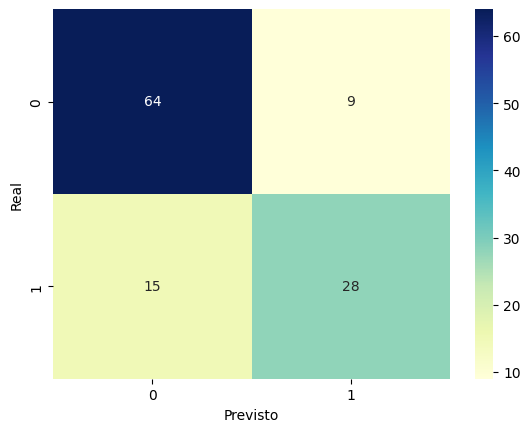

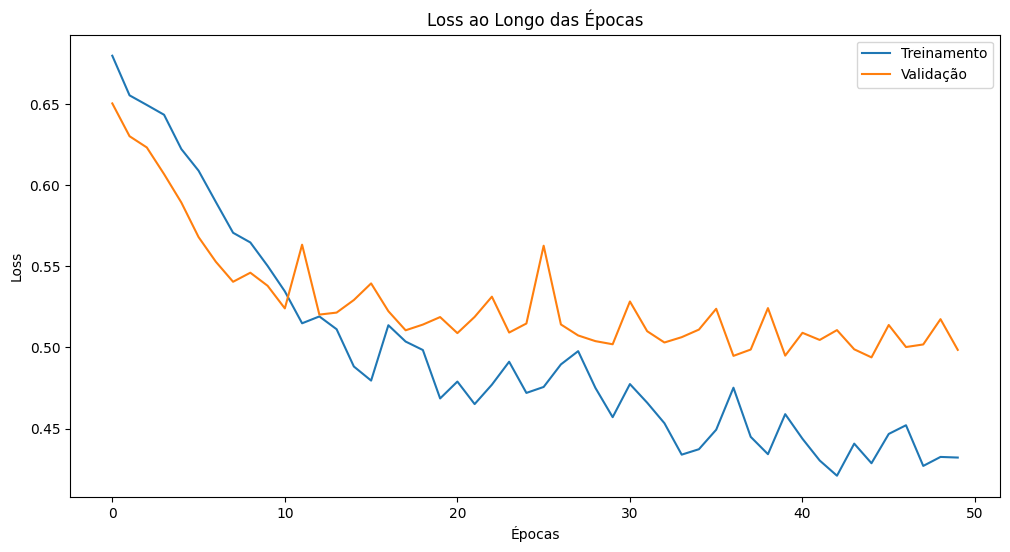

In [8]:
# Criar modelo
model_classificacao = Sequential()
model_classificacao.add(Input(shape=(X_train_classificacao.shape[1],)))  # Camada de entrada explícita
model_classificacao.add(Dense(128, activation='relu'))
model_classificacao.add(Dropout(0.5))
model_classificacao.add(Dense(64, activation='relu'))
model_classificacao.add(Dense(32, activation='relu'))
model_classificacao.add(Dropout(0.2))
model_classificacao.add(Dense(64, activation='relu'))
model_classificacao.add(Dense(1, activation='sigmoid'))  # Saída sigmoidal para classificação binária

# Compilar modelo
model_classificacao.compile(loss='binary_crossentropy', optimizer='adam')

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Treinar modelo com o Early Stopping como callback
history = model_classificacao.fit(X_train_classificacao, 
                    y_train_classificacao, 
                    epochs=50, 
                    batch_size=32,
                    validation_data=(X_val_classificacao, y_val_classificacao),
                    callbacks=[early_stopping])

model_classificacao
clear_output(wait=True)
metricas_classificacao(X_test_classificacao, y_test_classificacao, model_classificacao)
plot_loss(history)

## Análise das métricas
`Acurácia (78.44%)`:

A acurácia é uma métrica que mostra, de forma geral, quão frequentemente o classificador faz previsões corretas. Neste caso, o modelo acertou aproximadamente 78% das vezes, o que é um bom indicativo. No entanto, a acurácia por si só pode não refletir a real performance em datasets desbalanceados.

`Precisão (macro) (77.04%)`:

A precisão nos dá uma ideia de quão muitos dos itens identificados como positivos são realmente positivos. Uma precisão de 77% indica que, em média, quando o modelo prevê uma classe, está correto cerca de 77% das vezes. Isso significa que há uma margem de erro de 23%, onde o modelo pode estar fazendo previsões falsamente positivas.

`Recall (macro) (76.19%)`:

O recall (ou sensibilidade) indica quão muitos dos positivos reais foram identificados corretamente. Um recall de 76% sugere que o modelo captura a maioria das ocorrências positivas, mas ainda há 24% que ele não consegue identificar.

`F1-Score (macro) (76.55%)`:

O F1-Score é uma média harmônica entre precisão e recall, que busca um equilíbrio entre essas duas métricas. Um F1-Score de 76.55% indica um desempenho equilibrado entre precisão e recall, o que é desejável em muitas situações.

# Otimização de Hiperparâmetros

O que são? São configurações que definem aspectos do treinamento e da estrutura do modelo.

`learning_rate` = 0.001: Taxa de aprendizado é um hiperparâmetro que define o tamanho do passo que será usado no ajuste dos pesos durante o treinamento. Embora seja definido aqui, note que ele não está sendo usado diretamente no código fornecido, pois o otimizador 'adam' tem sua própria taxa de aprendizado adaptativa.

`batch_size` = 32: Tamanho do lote (ou batch) é a quantidade de amostras de dados que serão usadas para atualizar os pesos de uma única vez. Esse é um hiperparâmetro importante quando você está usando um método de otimização estocástico ou mini-batch.

`epochs` = 50: Número de épocas indica quantas vezes o algoritmo verá o conjunto de treinamento completo. Se você tem, digamos, 1000 amostras de treinamento e o batch_size é 100, então uma época terá 10 atualizações (passos) para o modelo.

`number_of_neurons_layer1` = 128 e `number_of_neurons_layer2` = 64 e `number_of_neurons_layer3` = 128: Estes definem o número de neurônios nas camadas ocultas da rede neural. A arquitetura e a profundidade da rede (número de camadas e neurônios em cada camada) são hiperparâmetros.

`activation_function` = 'relu': Função de ativação que é usada nos neurônios da rede. Dependendo da função escolhida, a rede pode aprender diferentes tipos de representações. O 'relu' (Rectified Linear Unit) é um dos mais populares atualmente.

`loss` = 'sparse_categorical_crossentropy': Define a função de perda, que é a métrica que a rede tentará minimizar durante o treinamento.

`optimizer` = 'adam': Define o otimizador usado, que é o algoritmo de otimização. Existem vários otimizadores e cada um tem seus próprios hiperparâmetros internos.

In [9]:
def create_model_regressao(activation='relu', learn_rate=0.01, batch_size=32, l1=0.01, l2=0.01, dropout_rate=0.2):
    model_regressao = Sequential()
    model_regressao.add(Input(shape=(X_train_regressao.shape[1],)))
    model_regressao.add(Dense(64, activation=activation, kernel_regularizer=l1_l2(l1=l1, l2=l2)))
    model_regressao.add(Dropout(dropout_rate))
    model_regressao.add(Dense(64, activation=activation, kernel_regularizer=l1_l2(l1=l1, l2=l2)))
    model_regressao.add(Dense(64, activation=activation, kernel_regularizer=l1_l2(l1=l1, l2=l2)))
    model_regressao.add(Dropout(dropout_rate))
    model_regressao.add(Dense(64, activation=activation, kernel_regularizer=l1_l2(l1=l1, l2=l2)))
    model_regressao.add(Dense(1, activation='linear'))
    model_regressao.compile(optimizer='adam', loss='mean_squared_error')
    return model_regressao


def create_model_classificacao(activation='relu', learn_rate=0.01, batch_size=32, l1=0.01, l2=0.01, dropout_rate=0.2):
    classificacao = Sequential()
    classificacao.add(Input(shape=(X_train_classificacao.shape[1],)))
    classificacao.add(Dense(128, activation=activation))
    classificacao.add(Dropout(dropout_rate))
    classificacao.add(Dense(64, activation=activation))
    classificacao.add(Dense(32, activation=activation))
    classificacao.add(Dropout(dropout_rate))
    classificacao.add(Dense(64, activation=activation))
    classificacao.add(Dense(1, activation='sigmoid'))
    classificacao.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classificacao

# Criando uma instância do KerasRegressor para regressão.
# O modelo é construído usando a função 'create_model_regressao' e será treinado por 20 épocas.
# O parâmetro 'verbose=0' garante que nenhum log de treinamento seja impresso durante o treinamento.
model_for_grid_reg = KerasRegressor(build_fn=create_model_regressao, epochs=20, verbose=0)

# Criando uma instância do KerasRegressor para classificação.
# O modelo é construído usando a função 'create_model_classificacao' e também será treinado por 20 épocas.
# Novamente, o parâmetro 'verbose=0' evita a impressão de logs de treinamento.
model_for_grid_clas = KerasRegressor(build_fn=create_model_classificacao, epochs=20, verbose=0)


C:\Users\Zenbook Leo\AppData\Local\Temp\ipykernel_15064\3188434076.py:31: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid_reg = KerasRegressor(build_fn=create_model_regressao, epochs=20, verbose=0)
C:\Users\Zenbook Leo\AppData\Local\Temp\ipykernel_15064\3188434076.py:36: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid_clas = KerasRegressor(build_fn=create_model_classificacao, epochs=20, verbose=0)


# Grid Search
O método Grid Search, ou busca em grade, consiste em testar manualmente cada combinação possível de hiperparâmetros. Por exemplo, se tivermos dois hiperparâmetros e quisermos testar 5 valores diferentes para cada um, realizaríamos um total de 25 treinamentos (5x5).

``Vantagens``:

É determinístico; você sabe exatamente quais combinações serão testadas.
Pode ser paralelizado facilmente.

``Desvantagens``:

Pode ser muito demorado, especialmente quando o espaço de busca é grande.
Não é eficiente, pois testa combinações que podem ser consideradas subótimas com base em resultados anteriores.

In [10]:

# Definindo uma grade de parâmetros para otimização.
# Esta grade especifica uma série de combinações de parâmetros que serão testadas durante a otimização do modelo.
# 'activation' especifica os tipos de funções de ativação a serem testadas: relu e tanh.
# 'learn_rate' especifica as taxas de aprendizado a serem testadas: 0.001, 0.01 e 0.1.
# 'batch_size' define o tamanho do lote que será usado no treinamento, neste caso, apenas 32.
# 'l1' e 'l2' definem os valores de regularização L1 e L2, respectivamente.
# 'dropout_rate' testa duas taxas de dropout diferentes: 0.1 e 0.2.
param_grid = {
    'activation': ['relu', 'tanh'],
    'learn_rate': [0.001, 0.01, 0.1],
    'batch_size': [32],
    'l1': [0.01],
    'l2': [0.001],
    'dropout_rate': [0.1, 0.2]  # Adicionando taxa de dropout ao param_grid
}

### Regressão

In [11]:
# Criando uma instância do GridSearchCV para otimização de hiperparâmetros usando pesquisa em grade.
# 'estimator' é o modelo que queremos otimizar, neste caso, é o regressor baseado em Keras.
# 'param_grid' contém a grade de hiperparâmetros que queremos testar.
# 'n_jobs=-1' permite que o processo utilize todos os núcleos disponíveis da máquina para acelerar a computação.
# 'cv=3' especifica que uma validação cruzada de 3-folds será usada durante a otimização.
grid_reg = GridSearchCV(estimator=model_for_grid_reg, param_grid=param_grid, n_jobs=-1, cv=3)

# Treinando o GridSearchCV com os dados de treinamento para regressão. 
# Isso iniciará a otimização de hiperparâmetros, testando todas as combinações de hiperparâmetros do 'param_grid'.
grid_result_reg = grid_reg.fit(X_train_regressao, y_train_regressao)

# Imprimindo os melhores hiperparâmetros encontrados pela otimização.
print(f"Melhores parâmetros: {grid_result_reg.best_params_}")

# Obtendo o melhor modelo (estimador) encontrado pelo GridSearchCV.
# Isso nos dá o modelo treinado com os melhores hiperparâmetros.
best_model_reg = grid_result_reg.best_estimator_.model

# Avaliando o melhor modelo usando um conjunto de testes e uma função 'metricas_regressao'.
# Esta função provavelmente imprime várias métricas de desempenho para avaliar o quão bem o modelo performa nos dados de teste.
# 'scaler_y_regressao' pode ser usado para reescalar as previsões, se os alvos (y) foram originalmente escalonados.
metricas_regressao(X_test_regressao, y_test_regressao, scaler_y_regressao, best_model_reg)


Melhores parâmetros: {'activation': 'tanh', 'batch_size': 32, 'dropout_rate': 0.2, 'l1': 0.01, 'l2': 0.001, 'learn_rate': 0.01}
93/93 [==============================] - 0s 1ms/step
Root Mean Square Error: 5.18
Mean Square Error: 12045.19
Mean Absolut Error: 68.64
Median Absolut Error: 52.92
Explain Variance Score: 0.0
R2 score: -0.22
Adjusted R2 = -1.0999999999999999


### Classificação

Melhores parâmetros: {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.1, 'l1': 0.01, 'l2': 0.001, 'learn_rate': 0.001}
4/4 [==============================] - 0s 2ms/step
Acurácia: 0.7758620689655172
Precisão (macro): 0.7894298793175197
Recall (macro): 0.7215673781459063
F1-Score (macro): 0.7340388007054673
Matriz de Confusão:


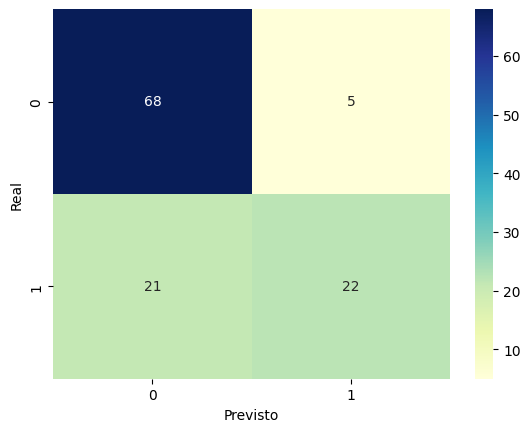

In [12]:
# Criando uma instância do GridSearchCV para otimização de hiperparâmetros usando pesquisa em grade.
# 'estimator' é o modelo que queremos otimizar, neste caso, é o classificador baseado em Keras.
# 'param_grid' contém a grade de hiperparâmetros que queremos testar.
# 'n_jobs=-1' permite que o processo utilize todos os núcleos disponíveis da máquina para acelerar a computação.
# 'cv=3' especifica que uma validação cruzada de 3-folds será usada durante a otimização.
grid_clas = GridSearchCV(estimator=model_for_grid_clas, param_grid=param_grid, n_jobs=-1, cv=3)

# Treinando o GridSearchCV com os dados de treinamento para classificação.
# Isso iniciará a otimização de hiperparâmetros, testando todas as combinações de hiperparâmetros do 'param_grid'.
grid_result_clas = grid_clas.fit(X_train_classificacao, y_train_classificacao)

# Imprimindo os melhores hiperparâmetros encontrados pela otimização.
print(f"Melhores parâmetros: {grid_result_clas.best_params_}")

# Obtendo o melhor modelo (estimador) encontrado pelo GridSearchCV.
# Isso nos dá o modelo treinado com os melhores hiperparâmetros.
best_model_clas = grid_result_clas.best_estimator_.model

# Avaliando o melhor modelo usando um conjunto de testes e uma função 'metricas_classificacao'.
# Esta função provavelmente imprime várias métricas de desempenho para avaliar o quão bem o modelo performa nos dados de teste.
metricas_classificacao(X_test_classificacao, y_test_classificacao, best_model_clas)

# Random Search
O método Random Search, ou busca aleatória, seleciona aleatoriamente combinações de hiperparâmetros a partir de uma distribuição pré-definida ou de um conjunto de valores válidos. Em vez de tentar todas as combinações possíveis (como no Grid Search), ele se baseia em amostrar aleatoriamente um número definido de combinações.

``Vantagens``:

- É mais eficiente do que o Grid Search, principalmente quando o espaço de busca é grande.
- Pode encontrar uma solução satisfatória em menos tempo, visto que não tenta todas as combinações.
- Menos propenso a overfitting em comparação com Grid Search, pois não é tão focado em encontrar o parâmetro ótimo, mas sim um bom conjunto de parâmetros.

``Desvantagens``:

- Não é determinístico; você não sabe quais combinações serão testadas.
- Não garante que encontrará a melhor combinação de hiperparâmetros, pois a busca é aleatória.
- O sucesso depende em grande parte da distribuição de onde os hiperparâmetros são amostrados e do número de iterações.

In [13]:
# Definindo um dicionário para os possíveis valores dos hiperparâmetros 
# que serão utilizados durante a busca aleatória (Random Search).

param_dist = {
    # Especificando diferentes funções de ativação para a rede neural.
    'activation': [
        'relu',      # Função de retificação linear.
        'tanh',      # Função tangente hiperbólica.
        'sigmoid',   # Função sigmoidal.
        'elu',       # Função linear exponencial.
        'selu',      # Função escalonada linear exponencial.
        'softplus',  # Função suavizadora baseada em log.
        'softsign'   # Função que retorna x / (abs(x) + 1).
    ],
    
    # Especificando diferentes taxas de aprendizado para o otimizador.
    'learn_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
    
    # Definindo diferentes tamanhos de lotes (batch sizes) para o treinamento.
    'batch_size': [8, 16, 32, 64, 128, 256],
    
    # Especificando diferentes valores para a regularização L1.
    # Isso ajuda a prevenir o ajuste excessivo, penalizando os pesos grandes.
    'l1': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    
    # Especificando diferentes valores para a regularização L2.
    # Assim como a L1, a L2 também penaliza os pesos, mas ao quadrado.
    'l2': [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    
    # Definindo diferentes taxas de dropout.
    # Dropout é uma técnica onde, durante o treinamento, aleatoriamente
    # "desligamos" certos neurônios, ajudando a prevenir o ajuste excessivo.
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5] 
}

### Regressão

In [14]:
# Inicialização do RandomizedSearchCV para otimização de hiperparâmetros:
# - `estimator`: Especifica o modelo a ser usado (neste caso, um regressor definido anteriormente).
# - `param_distributions`: Define o dicionário de hiperparâmetros a serem explorados.
# - `n_iter`: Número de combinações de hiperparâmetros a serem testadas.
# - `n_jobs=-1`: Utiliza todos os núcleos do processador para agilizar o processo.
# - `cv=3`: Utiliza validação cruzada de 3-folds durante a otimização.
random_search_reg = RandomizedSearchCV(
    estimator=model_for_grid_reg,
    param_distributions=param_dist,
    n_iter=4,
    n_jobs=-1,
    cv=3
)

# Treina o RandomizedSearchCV com os dados de treinamento fornecidos.
# O modelo vai treinar várias versões com diferentes hiperparâmetros e
# vai selecionar a melhor combinação com base na performance na validação cruzada.
random_result_reg = random_search_reg.fit(X_train_regressao, y_train_regressao)

# Exibe os melhores hiperparâmetros encontrados durante a otimização.
# (Nota: Parece haver um erro no código original. Deve-se usar `random_result_reg.best_params_` em vez de `random_result.best_params_`).
print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result_reg.best_params_}")

# Obtém o melhor modelo de regressão encontrado pelo RandomizedSearchCV.
best_model_reg = random_result_reg.best_estimator_.model

# Avalia o desempenho do melhor modelo usando os dados de teste.
# A função `metricas_regressao` (não mostrada) provavelmente calcula e exibe métricas relevantes,
# como MSE (Erro Quadrático Médio) ou RMSE (Raiz do Erro Quadrático Médio) para o modelo de regressão.
metricas_regressao(X_test_regressao, y_test_regressao, scaler_y_regressao, best_model_reg)

Melhores parâmetros usando RandomizedSearchCV: {'learn_rate': 0.0001, 'l2': 5e-05, 'l1': 0.0001, 'dropout_rate': 0.5, 'batch_size': 16, 'activation': 'elu'}
93/93 [==============================] - 0s 2ms/step
Root Mean Square Error: 6.98
Mean Square Error: 12067.17
Mean Absolut Error: 62.51
Median Absolut Error: 44.92
Explain Variance Score: 0.0
R2 score: -0.41
Adjusted R2 = -1.3


### Classificação

Melhores parâmetros usando RandomizedSearchCV: {'learn_rate': 0.5, 'l2': 0.1, 'l1': 0.005, 'dropout_rate': 0.3, 'batch_size': 64, 'activation': 'softsign'}
4/4 [==============================] - 0s 2ms/step
Acurácia: 0.75
Precisão (macro): 0.7346813725490196
Recall (macro): 0.7440267601146862
F1-Score (macro): 0.7378224612267166
Matriz de Confusão:


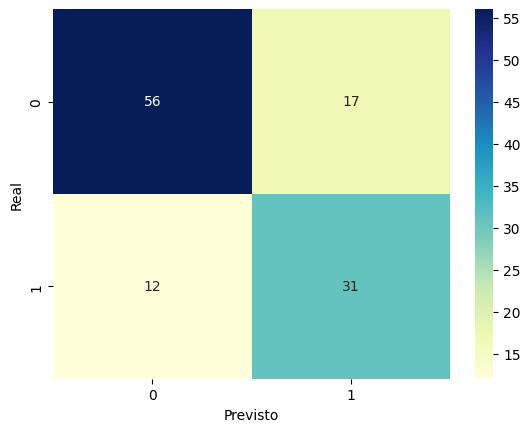

In [15]:
# Inicialização do RandomizedSearchCV para otimização de hiperparâmetros:
# - `estimator`: Especifica o modelo a ser usado (neste caso, um classificador definido anteriormente).
# - `param_distributions`: Define o dicionário de hiperparâmetros a serem explorados.
# - `n_iter`: Número de combinações de hiperparâmetros a serem testadas.
# - `n_jobs=-1`: Utiliza todos os núcleos do processador para agilizar o processo.
# - `cv=3`: Utiliza validação cruzada de 3-folds durante a otimização.
random_search_clas = RandomizedSearchCV(
    estimator=model_for_grid_clas,
    param_distributions=param_dist,
    n_iter=4,
    n_jobs=-1,
    cv=3
)

# Treina o RandomizedSearchCV com os dados de treinamento fornecidos.
# O modelo vai treinar várias versões com diferentes hiperparâmetros e
# vai selecionar a melhor combinação com base na performance na validação cruzada.
random_result_clas = random_search_clas.fit(X_train_classificacao, y_train_classificacao)

# Exibe os melhores hiperparâmetros encontrados durante a otimização.
print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result_clas.best_params_}")

# Obtém o melhor modelo de classificação encontrado pelo RandomizedSearchCV.
best_model_clas = random_result_clas.best_estimator_.model

# Avalia o desempenho do melhor modelo usando os dados de teste.
# A função `metricas_classificacao` (não mostrada) provavelmente calcula e exibe métricas relevantes,
# como acurácia, precisão, recall, F1, entre outras, para o modelo de classificação.
metricas_classificacao(X_test_classificacao, y_test_classificacao, best_model_clas)


# Otimização Bayesiana
A Otimização Bayesiana é um método probabilístico para encontrar o mínimo de uma função, e é frequentemente usada na seleção de hiperparâmetros em aprendizado de máquina. Em vez de testar combinações aleatórias ou em uma grade regular, ela constrói um modelo probabilístico do objetivo e utiliza isso para selecionar os próximos hiperparâmetros a testar.

``Vantagens``:

- Eficiência: A Otimização Bayesiana tende a requerer menos avaliações da função objetivo que outras técnicas, como Grid Search ou Random Search. Isso ocorre porque ela se baseia em um modelo probabilístico para guiar a busca, priorizando áreas do espaço de hiperparâmetros que são mais promissoras.

- Incorpora Incerteza: Ao contrário de métodos determinísticos, a Otimização Bayesiana considera a incerteza na estimativa do objetivo, o que pode ser útil quando as avaliações são ruidosas.

- Flexibilidade: Pode ser usada em problemas onde o espaço de hiperparâmetros é contínuo, discreto ou uma mistura de ambos.

``Desvantagens``:

- Complexidade: O método em si é mais complexo do que o Grid Search ou Random Search. Isso pode tornar mais difícil entender e diagnosticar problemas ou ineficiências no processo de otimização.

- Custo Computacional: Construir e atualizar o modelo probabilístico (frequentemente um Processo Gaussiano) pode ser computacionalmente caro, especialmente à medida que mais pontos são avaliados.

- Limitações Locais: Como todos os métodos de otimização, a Otimização Bayesiana pode ficar presa em mínimos locais, embora tente equilibrar a exploração e explotação para mitigar isso.

### Regressão

In [16]:
# Importando bibliotecas necessárias
from bayes_opt import BayesianOptimization
import numpy as np

def objective_function_regressao(activation_index, learn_rate, l1, l2):
    # Lista de funções de ativação que podem ser usadas no modelo
    activations = ['relu', 'tanh']
    
    # Converte o índice fornecido em uma string correspondente à função de ativação
    activation = activations[int(activation_index)]
    
    # Cria o modelo de regressão com os hiperparâmetros fornecidos
    model = create_model_regressao(activation=activation, learn_rate=learn_rate, l1=l1, l2=l2)
    
    # Treina o modelo. O argumento 'verbose=0' garante que não haja saída durante o treinamento
    history = model.fit(X_train_regressao, y_train_regressao, epochs=20, verbose=0, validation_split=0.2)
    
    # Calcula a raiz do erro quadrático médio de validação
    # Convertendo para negativo porque a otimização bayesiana tenta maximizar a função objetivo.
    val_rmse = np.sqrt(min(history.history['val_loss']))
    return -val_rmse

# Limites para os hiperparâmetros que serão otimizados
pbounds = {
    'activation_index': (0, 1),
    'learn_rate': (0.001, 0.1),
    'l1': (0.0001, 0.01),
    'l2': (0.0001, 0.01)
}

# Inicializa o otimizador bayesiano com a função objetivo e os limites definidos
optimizer = BayesianOptimization(f=objective_function_regressao, pbounds=pbounds, random_state=1)

# Executa a otimização bayesiana
optimizer.maximize(init_points=5, n_iter=4)

# Exibe os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")


|   iter    |  target   | activa... |    l1     |    l2     | learn_... |
-------------------------------------------------------------------------
| 1         | -0.1485   | 0.417     | 0.007231  | 0.0001011 | 0.03093   |
| 2         | -0.1061   | 0.1468    | 0.001014  | 0.001944  | 0.03521   |
| 3         | -0.1374   | 0.3968    | 0.005434  | 0.00425   | 0.06884   |
| 4         | -0.1567   | 0.2045    | 0.008793  | 0.0003711 | 0.06738   |
| 5         | -0.1375   | 0.4173    | 0.005631  | 0.00149   | 0.02061   |
| 6         | -0.09816  | 0.1337    | 0.0001    | 0.002301  | 0.02801   |
| 7         | -0.09824  | 0.1116    | 0.0001    | 0.0001    | 0.05009   |
| 8         | -0.1487   | 0.08755   | 0.007393  | 0.007877  | 0.008616  |
| 9         | -0.09783  | 0.1271    | 0.0001    | 0.01      | 0.07424   |
Melhores parâmetros usando otimização bayesiana: {'activation_index': 0.12705000366494737, 'l1': 0.0001, 'l2': 0.01, 'learn_rate': 0.07424183389700274}


### Classificação

In [17]:
# Importando bibliotecas necessárias
from bayes_opt import BayesianOptimization
import numpy as np

def objective_function_classificacao(activation_index, learn_rate, l1, l2):
    # Lista de funções de ativação que podem ser usadas no modelo
    activations = ['relu', 'tanh']
    
    # Converte o índice fornecido em uma string correspondente à função de ativação
    activation = activations[int(activation_index)]
    
    # Cria o modelo de classificação com os hiperparâmetros fornecidos
    model = create_model_classificacao(activation=activation, learn_rate=learn_rate, l1=l1, l2=l2)
    
    # Treina o modelo. O argumento 'verbose=0' garante que não haja saída durante o treinamento
    history = model.fit(X_train_classificacao, y_train_classificacao, epochs=20, verbose=0, validation_split=0.2)

    # Obtém a acurácia de validação da última época.
    val_accuracy = history.history['val_accuracy'][-1]
    
    # Aqui, usaremos a taxa de erro de validação (assumindo que "val_accuracy" esteja em 'history.history')
    # Convertendo para negativo, pois a otimização bayesiana tenta maximizar a função objetivo.
    val_error = 1 - val_accuracy

    return -val_error

# Limites para os hiperparâmetros que serão otimizados
pbounds = {
    'activation_index': (0, 1),
    'learn_rate': (0.001, 0.1),
    'l1': (0.0001, 0.01),
    'l2': (0.0001, 0.01)
}

# Inicializa o otimizador bayesiano com a função objetivo e os limites definidos
optimizer = BayesianOptimization(f=objective_function_classificacao, pbounds=pbounds, random_state=1)

# Executa a otimização bayesiana
optimizer.maximize(init_points=5, n_iter=4)

# Exibe os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")

|   iter    |  target   | activa... |    l1     |    l2     | learn_... |
-------------------------------------------------------------------------
| 1         | -0.2315   | 0.417     | 0.007231  | 0.0001011 | 0.03093   |
| 2         | -0.25     | 0.1468    | 0.001014  | 0.001944  | 0.03521   |
| 3         | -0.25     | 0.3968    | 0.005434  | 0.00425   | 0.06884   |
| 4         | -0.25     | 0.2045    | 0.008793  | 0.0003711 | 0.06738   |
| 5         | -0.2685   | 0.4173    | 0.005631  | 0.00149   | 0.02061   |
| 6         | -0.287    | 0.00772   | 0.001702  | 0.007123  | 0.07671   |
| 7         | -0.2407   | 0.4426    | 0.004193  | 0.005523  | 0.07468   |
| 8         | -0.2963   | 0.6234    | 0.00231   | 0.009595  | 0.08066   |
| 9         | -0.213    | 0.02121   | 0.008098  | 0.009652  | 0.07051   |
Melhores parâmetros usando otimização bayesiana: {'activation_index': 0.021206273652628838, 'l1': 0.00809802427230454, 'l2': 0.009652069856921562, 'learn_rate': 0.07050522969711596}


# Exercícios


### ``1 - ``Desenvolva uma rede neural com 3 camadas ocultas para realizar uma classificação binária na base atual. Usando Grid Search, determine a melhor combinação de neurônios nas camadas dentre os valores 56, 72 e 98. Explore as funções de ativação 'relu', 'sigmoid' e 'tanh' e determine o melhor tamanho de batch entre 32, 64 e 128. Treine o modelo por 20 épocas usando X_train_classificacao.



### ``2 - ``Construa uma rede neural com 6 camadas ocultas para regressão na base atual. Utilizando Random Search, encontre a melhor quantidade de neurônios para cada camada dentre os valores 56, 72, 98, 116, 241, 250 e 260. Além disso, identifique a melhor função de ativação entre 'relu', 'sigmoid' e 'tanh'. Limite a busca a 10 iterações, treine por 20 épocas e use os dados X_train_regressao.



### ``3 - ``Desenhe uma rede neural para classificação binária com 4 camadas ocultas usando a base atual. Implemente o Grid Search para identificar a melhor combinação de neurônios nas camadas, considerando os valores 40, 65 e 105, e as melhores funções de ativação entre 'relu' e 'tanh'. Além disso, defina a melhor taxa de dropout entre 0.2, 0.5 e 0.8. Use X_train_classificacao e treine por 25 épocas.



### ``4 - ``Elabore um modelo com 5 camadas ocultas para regressão na base atual. Com o auxílio do Random Search, descubra a quantidade ideal de neurônios nas camadas dentre os valores 45, 85, 115, 155 e 220. Determine a melhor função de ativação entre 'relu' e 'sigmoid' e otimize o tamanho do batch entre 32 e 64. Treine o modelo por 30 épocas usando X_train_regressao.



### ``5 - ``Projete uma rede neural com 3 camadas ocultas para classificação binária na base de hoje. Use Grid Search para encontrar a melhor combinação de neurônios (50, 75, 100), função de ativação ('relu', 'tanh') e taxa de aprendizado (0.001, 0.01, 0.1). Defina o treinamento para 30 épocas e utilize os dados X_train_classificacao.



### ``6 - ``Crie uma arquitetura de rede neural com 7 camadas ocultas para regressão na base atual. Use Random Search para identificar a melhor combinação de neurônios (40, 80, 140, 210, 250), função de ativação ('relu', 'sigmoid') e taxa de dropout (0.2, 0.5). Prossiga com o treinamento por 15 épocas com X_train_regressao, usando um máximo de 10 iterações.



### ``7 - ``Desenvolva um modelo de rede neural com 2 camadas ocultas para classificação binária na base atual. Aplique Grid Search para otimizar neurônios (30, 60, 90), função de ativação ('relu', 'tanh', 'sigmoid'), taxa de aprendizado (0.001, 0.01) e tamanho do batch (32, 64). Treine por 35 épocas com X_train_classificacao.



### ``8 - ``Implemente uma rede neural com 4 camadas ocultas voltada para regressão na base atual. Utilizando Random Search, defina a melhor quantidade de neurônios (50, 100, 150, 200), função de ativação ('relu', 'sigmoid') e tamanho do batch (32, 64, 128). Estabeleça um máximo de 8 iterações e treine o modelo por 20 épocas com X_train_regressao.



### ``9 - ``Projete uma rede neural de 3 camadas ocultas para classificação binária. Usando Grid Search, otimize neurônios (45, 70, 95), função de ativação ('relu', 'sigmoid'), taxa de aprendizado (0.001, 0.01) e defina a melhor estratégia de early stopping entre patience de 5 ou 10. Treine o modelo por 40 épocas com X_train_classificacao.



### ``10 - ``Crie uma arquitetura de rede neural de 6 camadas ocultas para regressão. Com Random Search, descubra a melhor combinação de neurônios (35, 75, 110, 165, 235, 255), função de ativação ('relu', 'tanh'), tamanho do batch (32, 64) e taxa de dropout (0.3, 0.6). Estabeleça um limite de 12 iterações e prossiga com o treinamento por 20 épocas usando X_train_regressao.